## Prioritizing Service Delivery of Rodent Issue in NYC

Lingyi Zhang (lz1714)

### 1. Identify the problem

How do rodent complaints correlated with the numbers of businesses?

In this research, I used two datasets:
1. [311 data from calendar year 2016]("https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data")
2. [Legally operating businesses in NYC]("https://data.cityofnewyork.us/Business/Legally-Operating-Businesses/w7w3-xahh")

### 2. Descriptive statistics

In [1]:
%matplotlib inline
from __future__  import print_function, division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
from IPython.display import Image

Prepare the 311 data

In [2]:
#read the data
df = pd.read_csv('311_Service_Requests_2016.csv', dtype={'Incident Zip':'str'})

In [3]:
#drop redundant columns
df.drop(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'], axis=1, inplace=True)
df.head()

,Unique Key,Incident Zip
0,32310161,10473
1,32310287,10468
2,32310788,10029
3,32310789,11432
4,32310790,11210


In [4]:
#count the number in each area
rodentCount = df.groupby(df['Incident Zip'], as_index=False).count()
rodentCount.rename(columns = { 'Incident Zip': 'Zip Code', 
                'Unique Key': 'Counts_of_Rodent_Complaints'}, inplace=True)
rodentCount.head()

,Zip Code,Counts_of_Rodent_Complaints
0,00083,11
1,10000,1
2,10001,121
3,10002,332
4,10003,223


Prepare the data of legally operating businesses

In [5]:
# read the data
dfBusi = pd.read_csv('Legally_Operating_Businesses.csv', encoding = "ISO-8859-1", dtype={'Incident Zip':'str'})

In [6]:
#drop redundant columns
dfBusi.drop(['License Type', 'License Expiration Date',
       'License Category', 'Business Name', 'Business Name 2',
       'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Contact Phone Number', 'Address Borough', 'Detail',
       'Longitude', 'Latitude'], axis=1, inplace=True)
dfBusi.head()

,DCA License Number,Address ZIP
0,2045982-DCA,11209
1,2021527-2-DCA,10472
2,2053783-DCA,11204
3,1464636-DCA,10965
4,2039354-DCA,10013


In [7]:
#count the number in each area
busiCount = dfBusi.groupby(dfBusi['Address ZIP'], as_index=False).count()
busiCount.rename(columns = { 'Address ZIP' : 'Zip Code', 
            'DCA License Number': 'Number_of_business'}, inplace=True)
busiCount.head()

,Zip Code,Number_of_business
0,10001,588
1,10002,521
2,10003,510
3,10004,89
4,10005,69


Merge these two datasets

In [8]:
dfMerg = pd.merge(rodentCount, busiCount, on='Zip Code', how='inner')
dfMerg.head()

,Zip Code,Counts_of_Rodent_Complaints,Number_of_business
0,10001,121,588
1,10002,332,521
2,10003,223,510
3,10004,11,89
4,10005,10,69


Generate descriptives

In [9]:
dfMerg.describe(exclude=[np.object])

,Counts_of_Rodent_Complaints,Number_of_business
count,184.000000,184.000000
mean,170.451087,328.184783
std,151.404852,191.673785
min,1.000000,2.000000
25%,63.000000,185.500000
50%,128.000000,306.000000
75%,244.500000,448.000000
max,878.000000,939.000000


Plot scatterplot for two key variables

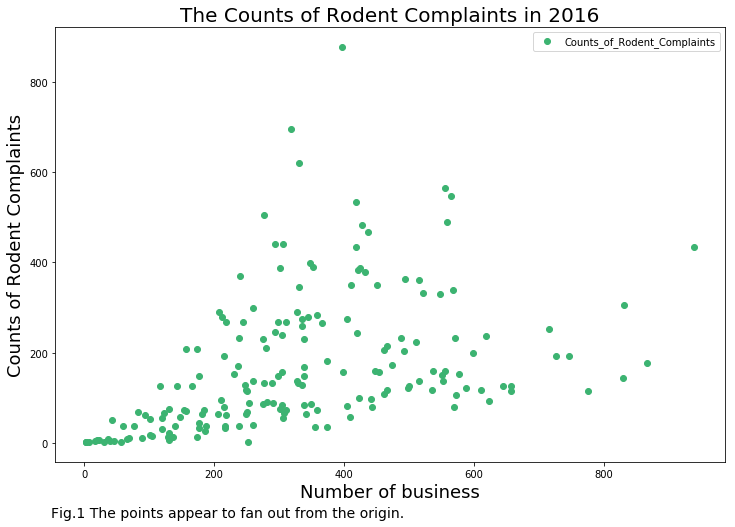

In [10]:
fig = plt.figure(figsize=(12,8))
plt.plot(dfMerg['Number_of_business'], dfMerg['Counts_of_Rodent_Complaints'], 'o', color='mediumseagreen')
plt.title('The Counts of Rodent Complaints in 2016', fontsize = 20)
plt.xlabel('Number of business', fontsize = 18)
plt.ylabel('Counts of Rodent Complaints', fontsize = 18)
fig.text(.12, .03, "Fig.1 The points appear to fan out from the origin.", fontsize = 14)
plt.legend()

### 3. Visualization

I used the software ArcGIS to map the locations of 311 rodent complaints.

The shapefile of [Zip Code Boundaries]("https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u") is downloaded from NYC Open Data.

In [11]:
# output the data by zip code for map plotting
rodentCount.to_csv('rodentbyZip.csv')

The output produced through ArcGIS:

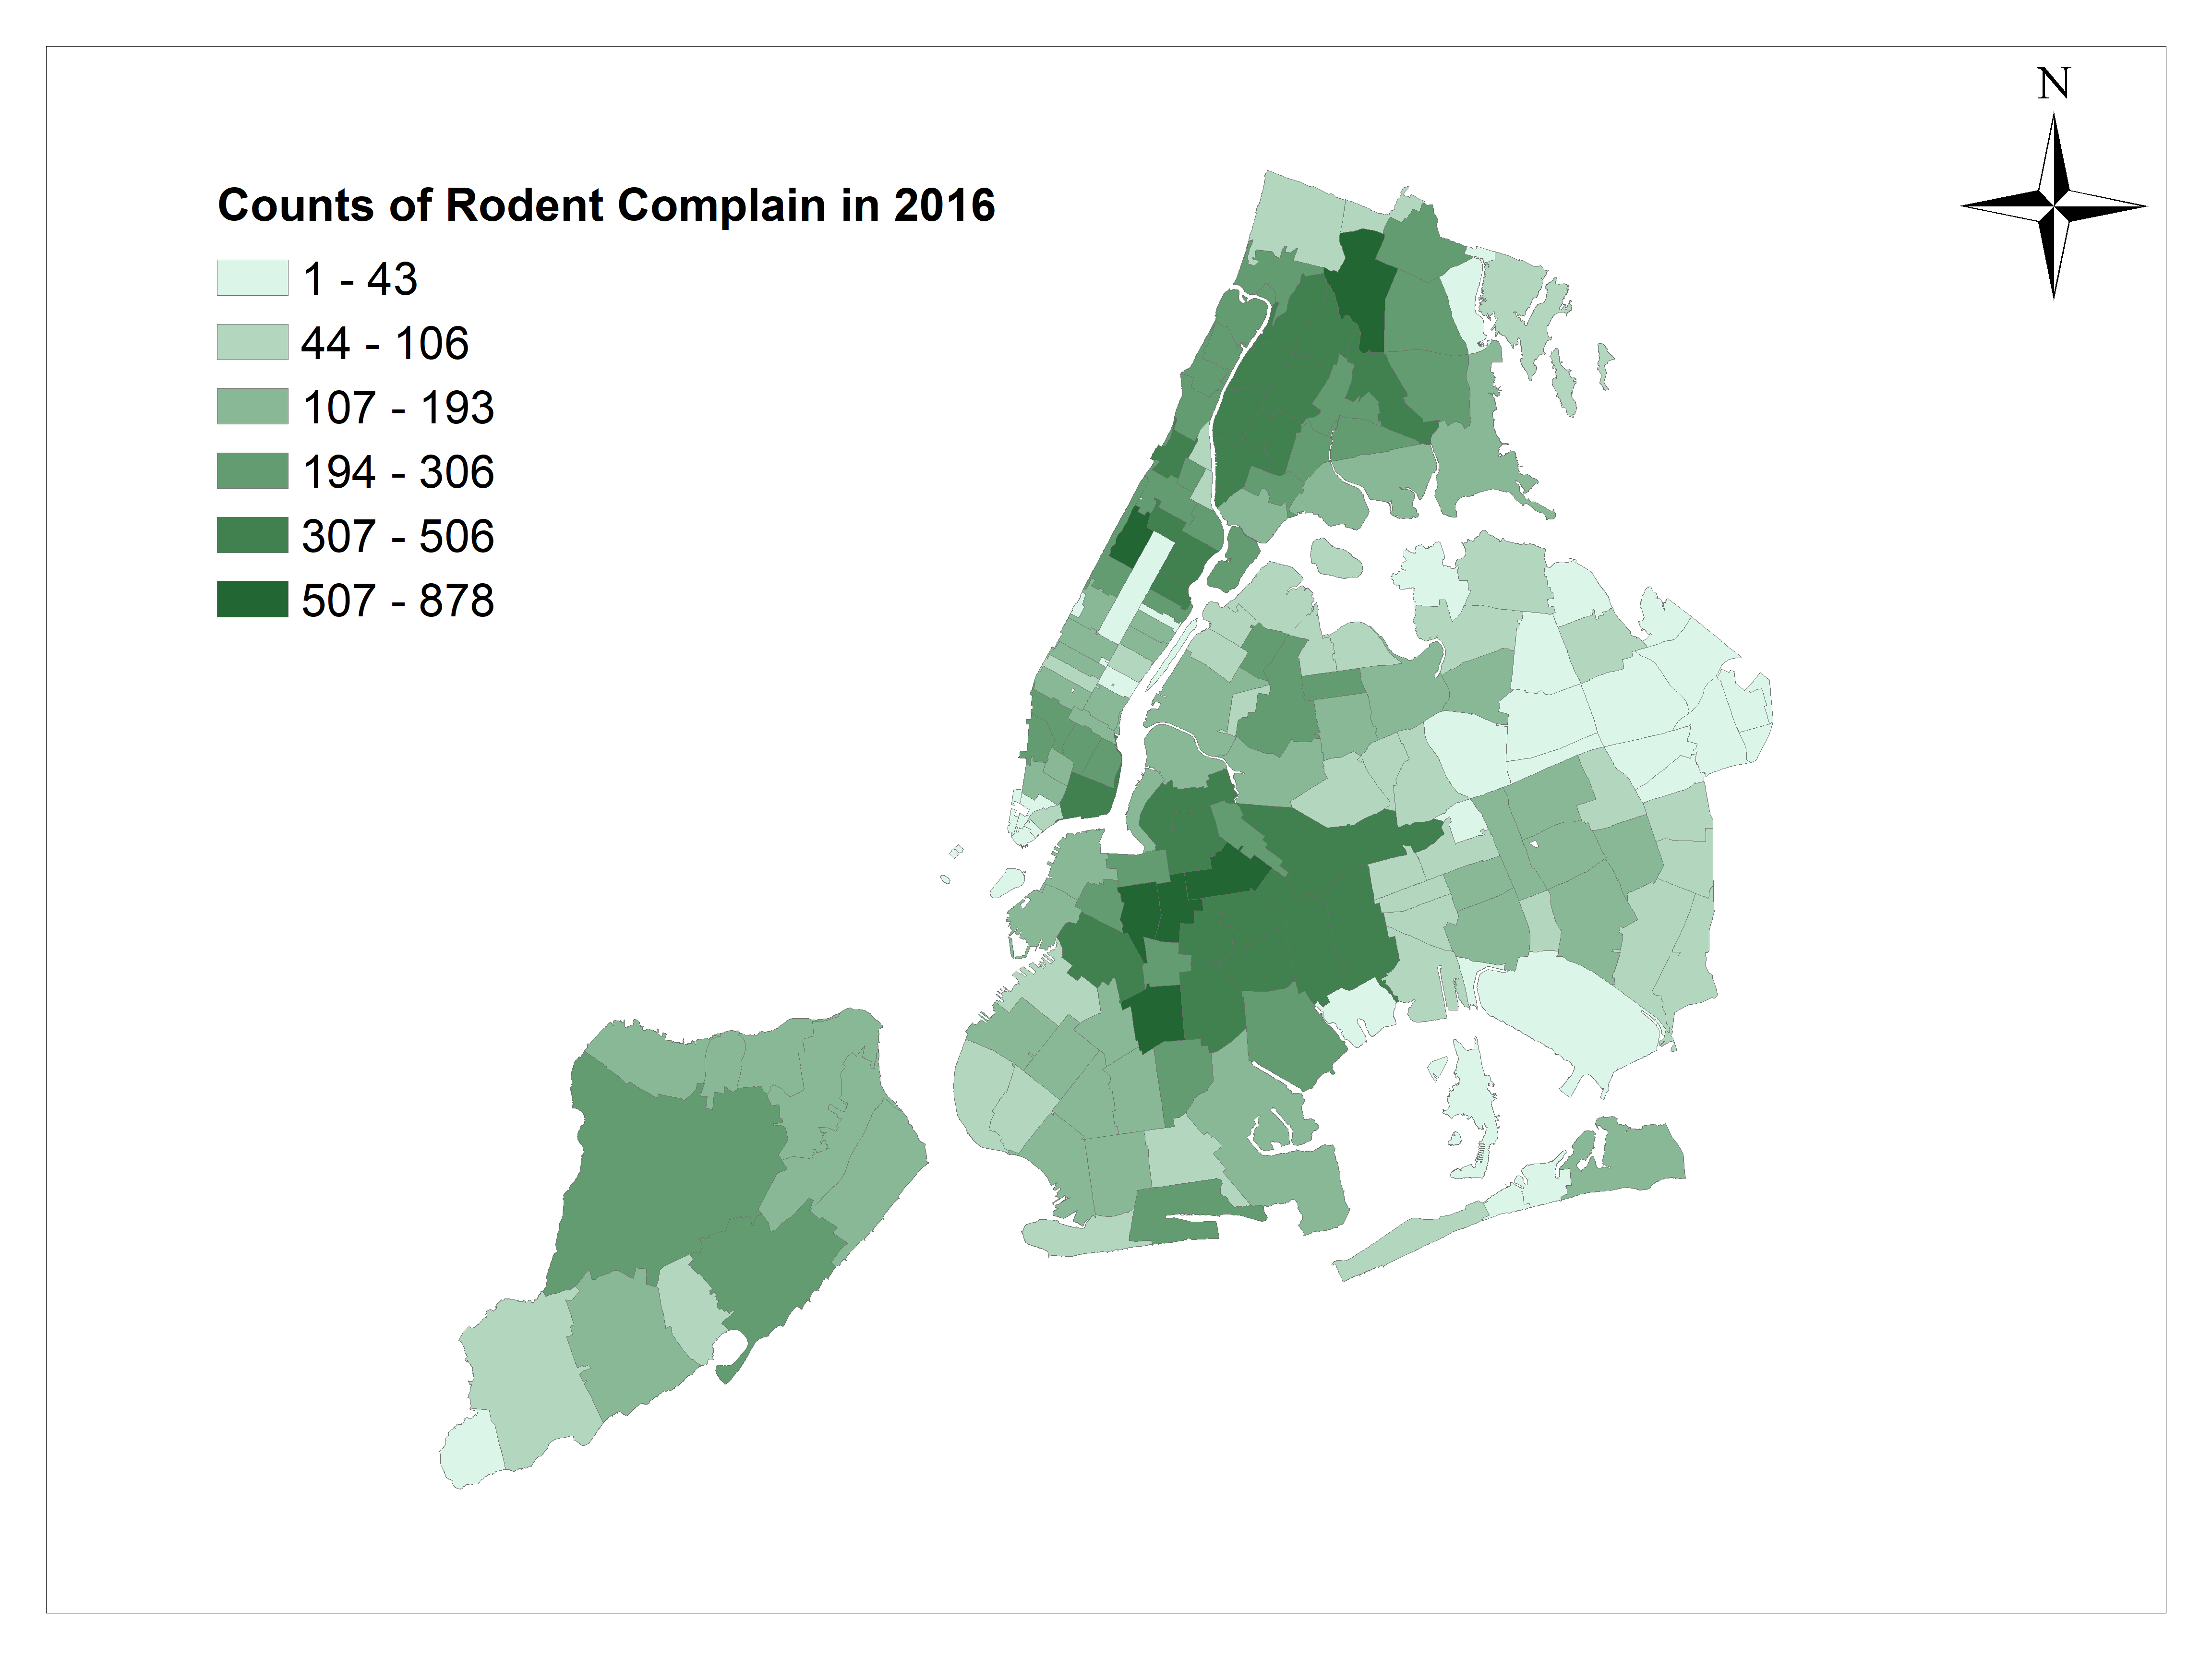

In [12]:
Image("rodentbyZip.png")

Fig2. Counts of Rodent Complain vary by locations. The classification method of legend is "Natural Breaks (Jenks)".

### 4. Analysis

Here I did a linear regression as:                                       

#### Counts_of_Rodent_Complain = $w_1$ * Number_of_business + $w_2$

In [13]:
lm = smf.ols('Counts_of_Rodent_Complaints~Number_of_business', data=dfMerg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Counts_of_Rodent_Complaints   R-squared:                       0.180
Model:                                     OLS   Adj. R-squared:                  0.176
Method:                          Least Squares   F-statistic:                     39.96
Date:                         Mon, 09 Oct 2017   Prob (F-statistic):           1.95e-09
Time:                                 19:56:30   Log-Likelihood:                -1166.0
No. Observations:                          184   AIC:                             2336.
Df Residuals:                              182   BIC:                             2342.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.4568     20.137      3.002      0.003      20.725     100.188
Number_of_business     0.3352      0.053      6.321      0.000       0.231       0.440
==============================================================================
Omnibus:                       73.811   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.078
Skew:                           1.705   Prob(JB):                     2.41e-46
Kurtosis:                       6.972   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the distribution showed in the Fig.1, the points appear to fan out from the origin. So I applied log to both the indepentdent and dependent variables. The new model is:                                      

#### log_CoRC = $w_1$ * log_NoB + $w_2$

In [14]:
#log transform the data
log_NoB = np.log(dfMerg['Number_of_business'])
log_CoRC = np.log(dfMerg['Counts_of_Rodent_Complaints'])
datalog = pd.DataFrame(data=[log_NoB, log_CoRC]).T
datalog.reset_index(inplace=True, drop=True) #reseting index 
datalog.rename(columns = { 'Number_of_business' : 'log_NoB',
                          'Counts_of_Rodent_Complaints' : 'log_CoRC'}, inplace=True)
datalog.head()

,log_NoB,log_CoRC
0,6.376727,4.795791
1,6.255750,5.805135
2,6.234411,5.407172
3,4.488636,2.397895
4,4.234107,2.302585


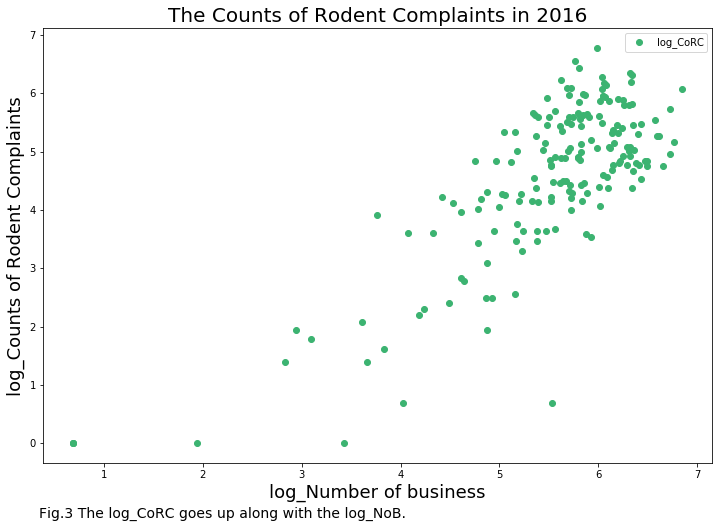

In [15]:
#plot the correlation
fig = plt.figure(figsize=(12,8))
plt.plot(datalog['log_NoB'], datalog['log_CoRC'], 'o', color='mediumseagreen')
plt.title('The Counts of Rodent Complaints in 2016', fontsize = 20)
plt.xlabel('log_Number of business', fontsize = 18)
plt.ylabel('log_Counts of Rodent Complaints', fontsize = 18)
fig.text(.12, .03, "Fig.3 The log_CoRC goes up along with the log_NoB.", fontsize = 14)
plt.legend()

In [16]:
#linear regression
lm = smf.ols('log_NoB~log_CoRC', data=datalog).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_NoB   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 09 Oct 2017   Prob (F-statistic):           4.48e-41
Time:                        19:56:30   Log-Likelihood:                -169.63
No. Observations:                 184   AIC:                             343.3
Df Residuals:                     182   BIC:                             349.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8872      0.156     18.553      0.000       2.580       3.194
log_CoRC       0.5737      0.033     17.577      0.000       0.509       0.638
==============================================================================
Omnibus:                       18.601   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.748
Skew:                          -0.486   Prob(JB):                     1.73e-08
Kurtosis:                       4.928   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Discussion

From the result of the regression model: log_CoRC = $w_1$ * log_NoB + $w_2$, log-transformed number of businesses showed a positively significant correlation with the log-transformed rodent complaints (P<0.001).                                                             

The areas with more businesses generally have higher frequencies of human activity. people here produce more food trashes in total, which might lead to the prevalence of rodents. 

The NYC Department of Health and Mental Hygiene (DOHMH) might use this finding to better locate their inspection resources. Areas with dense business activities might be the priorities of inspections.

In the future, the analysis might be conducted on a more precise level. In this way, it becomes possible to examine which type of business has higher correlation with the rodent problems. 